Source: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
# Import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print('Classes:', data['target_names'], '\n')
 
# Check the input attributes
print('Attributes:', data['feature_names'])

Classes: ['malignant' 'benign'] 

Attributes: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# Construct a dataframe using pandas
df1 = pd.DataFrame(data['data'], columns=data['feature_names'])

# Scale data befor applying PCA
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(df1)
scaled_data = scaling.transform(df1)

# Set the n_components=3
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(569, 3)


In [10]:
# Check the values of eigen vectors produced by principal components
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853121,  0.06455001, -0.00931418,  0.02869955, -0.10429164,
        -0.07409149,  0.00273387, -0.0255636 , -0

Text(0, 0.5, 'pc2')

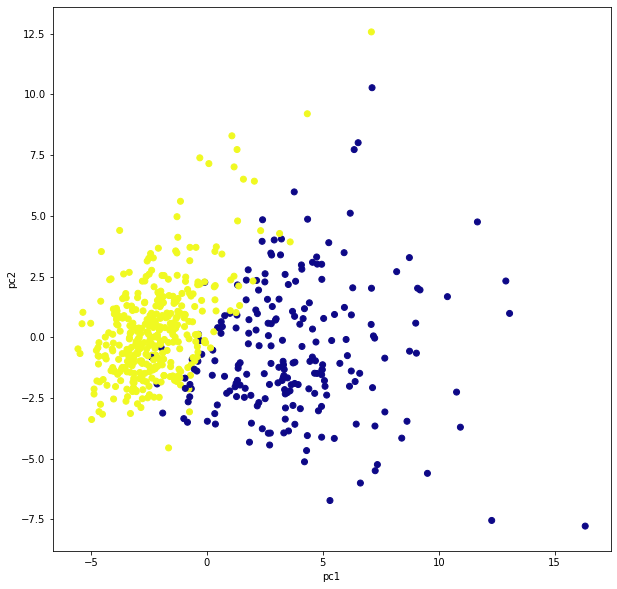

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=data['target'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

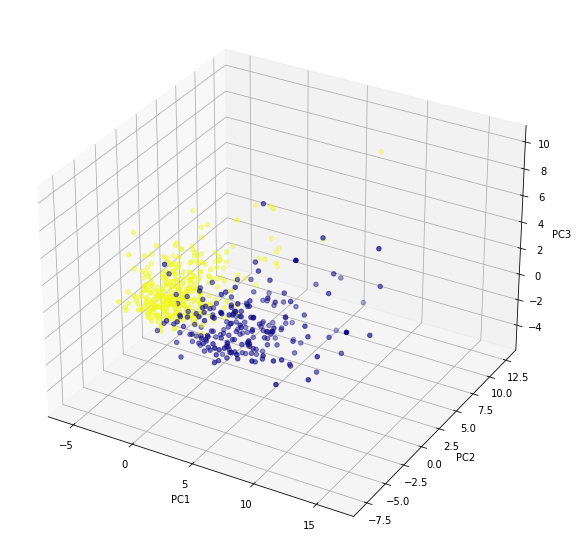

In [12]:
# Import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# Choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0] is pc1, x[:,1] is pc2, x[:,2] is pc3
axis.scatter(x[:,0], x[:,1], x[:,2], c=data['target'], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)

In [13]:
# Check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


Text(0.5, 1.0, 'Explained Variance Scree Plot')

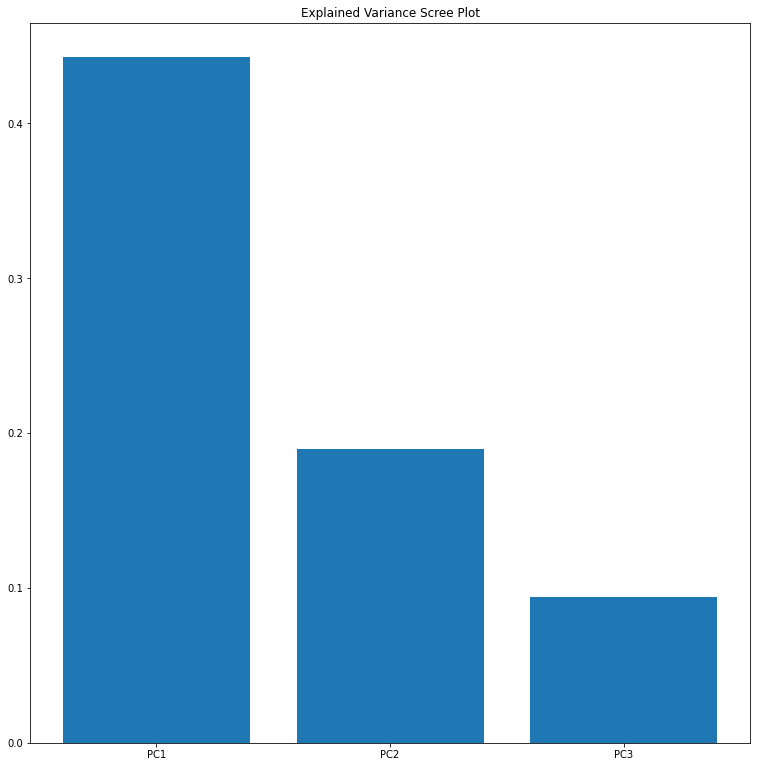

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0, 0, 1, 1])
components = ['PC1', 'PC2', 'PC3']
ax.bar(components, principal.explained_variance_ratio_)
ax.set_title('Explained Variance Scree Plot')